In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from algorithms import MyStandardScaler, MyPCA , MySoftmaxRegression , KNearestNeighbors  , XGBoostClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np


In [2]:
TRAIN_DATA_PATH = 'MNIST_train.csv'
VAL_DATA_PATH = 'MNIST_validation.csv'



In [3]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
val_data = pd.read_csv(VAL_DATA_PATH)

In [4]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


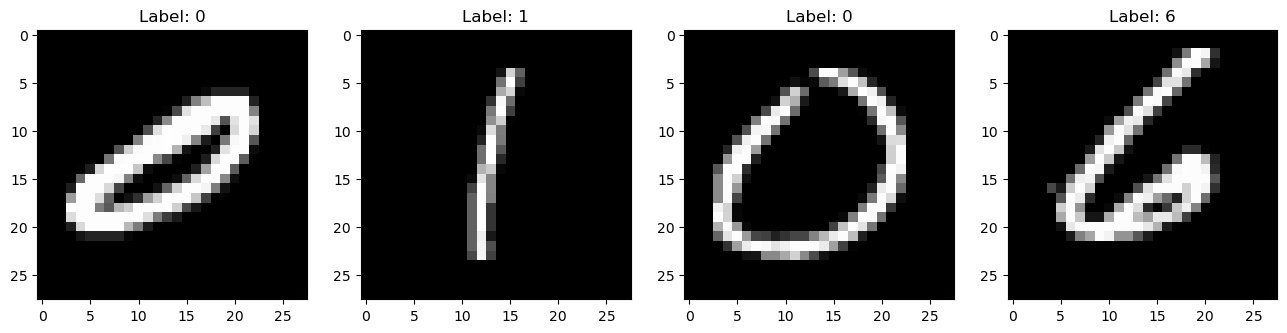

In [5]:
plt.figure(figsize=(16,4))

# image 1
plt.subplot(1, 4, 1)
plt.imshow(train_data.iloc[0,2:].values.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.title(f"Label: {train_data.iloc[0, 0]}")

# image 2
plt.subplot(1, 4, 2)
plt.imshow(train_data.iloc[100, 2:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.title(f"Label: {train_data.iloc[100, 0]}")

# image 3
plt.subplot(1, 4, 3)
plt.imshow(train_data.iloc[1000, 2:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.title(f"Label: {train_data.iloc[1000, 0]}")

# image 4
plt.subplot(1, 4, 4)
plt.imshow(train_data.iloc[2000, 2:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.title(f"Label: {train_data.iloc[2000, 0]}")

plt.show()

In [6]:
scaler = MyStandardScaler()
train_data_x = train_data.drop(columns=['label'])
train_data_y = train_data['label']
val_data_x = val_data.drop(columns=['label'])
val_data_y = val_data['label']

scaler.fit(train_data_x)
train_data_x = scaler.transform(train_data_x)
val_data_x = scaler.transform(val_data_x)

In [7]:
## now my implementation of PCA
pca98 =MyPCA(.98)
pca98.fit(train_data_x)
pca95 =MyPCA(.95)
pca95.fit(train_data_x)
pca90 =MyPCA(.90)
pca90.fit(train_data_x)
pca98_train_img = pca98.transform(train_data_x)
pca98_test_img = pca98.transform(val_data_x)
pca95_train_img = pca95.transform(train_data_x)
pca95_test_img = pca95.transform(val_data_x)
pca90_train_img = pca90.transform(train_data_x)
pca90_test_img = pca90.transform(val_data_x)
pca_dict = [{'object':pca98,'train_img':pca98_train_img,'test_img':pca98_test_img,'n_components':pca98.n_components_,'knn':6},
            {'object':pca95,'train_img':pca95_train_img,'test_img':pca95_test_img,'n_components':pca95.n_components_,'knn':4},
            {'object':pca90,'train_img':pca90_train_img,'test_img':pca90_test_img,'n_components':pca90.n_components_,'knn':6},]
print([x["n_components"] for x in pca_dict])


[np.int64(411), np.int64(289), np.int64(202)]


In [8]:
res98_train_img = pca98.inverse_transform(pca98_train_img)
res95_train_img = pca95.inverse_transform(pca95_train_img)
res90_train_img = pca90.inverse_transform(pca90_train_img)

res98_train_img = scaler.inverse_transform(res98_train_img)
res95_train_img = scaler.inverse_transform(res95_train_img)
res90_train_img = scaler.inverse_transform(res90_train_img)

res100_train_img = scaler.inverse_transform(train_data_x)

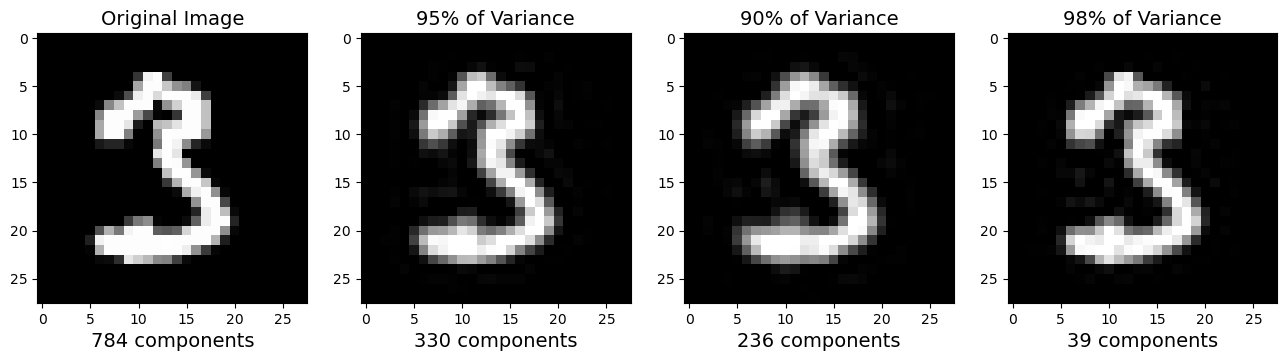

In [9]:
plt.figure(figsize=(16,4))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(res100_train_img.iloc[1,1:].values.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 14)

# 330 principal components
plt.subplot(1, 4, 2)
plt.imshow(res95_train_img.iloc[1,1:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('330 components', fontsize = 14)
plt.title('95% of Variance', fontsize = 14)

# 236 principal components
plt.subplot(1, 4, 3)
plt.imshow(res90_train_img.iloc[1,1:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('236 components', fontsize = 14)
plt.title('90% of Variance', fontsize = 14)

# 39 principal components
plt.subplot(1, 4, 4)
plt.imshow(res98_train_img.iloc[1,1:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('39 components', fontsize = 14)
plt.title('98% of Variance', fontsize = 14)
plt.show()

In [10]:
# Define the parameter grid for Softmax Regression
param_grid_softmax = {
    'learning_rate': [0.1],
    'epochs': [10]
}

# Store results
softmax_grid_search_results = {}

for pca_data in pca_dict:
    n_components = pca_data['n_components']
    print(f"--- Softmax Grid Search for PCA with {n_components} components ---")
    
    best_val_acc = -1
    best_params = {}
    overall_start_time = time.time()

    # Manual grid search
    for lr in param_grid_softmax['learning_rate']:
        for epochs in param_grid_softmax['epochs']:
            
            print(f"  Testing with learning_rate={lr}, epochs={epochs}...")
            start_time_combo = time.time()

            # Initialize and train the model
            model = MySoftmaxRegression(
                n_classes=10,
                n_features=n_components,
                learning_rate=lr
            )
            model.fit(pca_data['train_img'].values, train_data_y.values, epochs=epochs)
            
            # Evaluate on the validation set
            val_acc = model.evaluate(pca_data['test_img'].values, val_data_y.values)
            
            print(f"    Validation Accuracy: {val_acc*100:.2f}% | Time: {time.time() - start_time_combo:.2f}s")

            # Check if this is the best model so far
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {'learning_rate': lr, 'epochs': epochs}

    # Store and print the best results for the current PCA dataset
    softmax_grid_search_results[n_components] = {
        'best_params': best_params,
        'best_val_acc': best_val_acc
    }
    
    print(f"\nBest Parameters for {n_components} components: {best_params}")
    print(f"Best Validation Accuracy: {best_val_acc*100:.2f}%")
    print(f"Total time for this grid search: {time.time() - overall_start_time:.2f} seconds\n")

--- Softmax Grid Search for PCA with 411 components ---
  Testing with learning_rate=0.1, epochs=10...
Initialized model: 10 classes, 411 features, lr=0.1

Starting training for 10 epochs with batch size 128...
    Validation Accuracy: 93.52% | Time: 0.39s

Best Parameters for 411 components: {'learning_rate': 0.1, 'epochs': 10}
Best Validation Accuracy: 93.52%
Total time for this grid search: 0.39 seconds

--- Softmax Grid Search for PCA with 289 components ---
  Testing with learning_rate=0.1, epochs=10...
Initialized model: 10 classes, 289 features, lr=0.1

Starting training for 10 epochs with batch size 128...
    Validation Accuracy: 93.36% | Time: 0.32s

Best Parameters for 289 components: {'learning_rate': 0.1, 'epochs': 10}
Best Validation Accuracy: 93.36%
Total time for this grid search: 0.32 seconds

--- Softmax Grid Search for PCA with 202 components ---
  Testing with learning_rate=0.1, epochs=10...
Initialized model: 10 classes, 202 features, lr=0.1

Starting training for 

In [11]:
softmax_accuracy = {}

for dict in pca_dict:
    print(f"PCA with {dict['n_components']} components:")
    start_time = time.time()    
    model = MySoftmaxRegression(n_classes=10,n_features=dict['n_components'], learning_rate=0.01)
    model.fit(dict['train_img'].values, train_data_y.values, epochs=200)
    train_acc = model.evaluate(dict['train_img'].values, train_data_y.values)
    val_acc = model.evaluate(dict['test_img'].values, val_data_y.values)
    softmax_accuracy[dict['n_components']] = (train_acc, val_acc)
    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Validation Accuracy: {val_acc*100:.2f}%\n")
    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.2f} seconds\n")

PCA with 411 components:
Initialized model: 10 classes, 411 features, lr=0.01

Starting training for 200 epochs with batch size 128...
Training Accuracy: 97.24%
Validation Accuracy: 93.56%

Time taken: 7.83 seconds

PCA with 289 components:
Initialized model: 10 classes, 289 features, lr=0.01

Starting training for 200 epochs with batch size 128...
Training Accuracy: 96.82%
Validation Accuracy: 93.68%

Time taken: 7.21 seconds

PCA with 202 components:
Initialized model: 10 classes, 202 features, lr=0.01

Starting training for 200 epochs with batch size 128...


KeyboardInterrupt: 

In [ ]:

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# for dict in pca_dict:
#     print(f"PCA with {dict['n_components']} components for KNN:")
#     start_time = time.time()
    
#     # Define the parameter grid for k
#     param_grid = {'n_neighbors': np.arange(6)}
    
#     # Create a KNN classifier
#     knn = KNeighborsClassifier()
    
#     # Use GridSearchCV to find the best k
#     grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1,verbose=True)
#     grid_search.fit(dict['train_img'], train_data_y)
    
#     # Get the best model
#     best_knn = grid_search.best_estimator_
#     print(f"Optimal k: {grid_search.best_params_['n_neighbors']}")
    
#     # Evaluate the best model
#     train_acc = best_knn.score(dict['train_img'], train_data_y)
#     val_acc = best_knn.score(dict['test_img'], val_data_y)
    
#     print(f"Training Accuracy: {train_acc*100:.2f}%")
#     print(f"Validation Accuracy: {val_acc*100:.2f}%")
#     end_time = time.time()
#     print(f"Time taken: {end_time - start_time:.2f} seconds\n")

In [ ]:
knn_accuracy = {}

for dict in pca_dict:
    print(f"PCA with {dict['n_components']} components:")
    start_time = time.time()
    model = KNearestNeighbors(k=dict['knn'])
    model.fit(dict['train_img'], train_data_y.values)
    accuracy_val = accuracy_score(val_data_y.values, model.predict(dict['test_img']))
    accuracy_train = accuracy_score(train_data_y.values, model.predict(dict['train_img']))
    knn_accuracy[dict['n_components']] = (accuracy_train, accuracy_val)
    print(f"training Accuracy:{accuracy_train*100:.2f}%")
    print(f"validation Accuracy:{accuracy_val*100:.2f}%")
    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.2f} seconds\n")



PCA with 411 components:
training Accuracy:95.08%
validation Accuracy:92.60%
Time taken: 75.36 seconds

PCA with 289 components:
training Accuracy:96.86%
validation Accuracy:93.28%
Time taken: 45.24 seconds

PCA with 202 components:
training Accuracy:95.45%
validation Accuracy:93.28%
Time taken: 22.25 seconds



PCA with 411 components:
Training Accuracy: 11.24%
Validation Accuracy: 11.24%
Time taken: 0.02 seconds

PCA with 289 components:
Training Accuracy: 11.24%
Validation Accuracy: 11.24%
Time taken: 0.02 seconds

PCA with 202 components:
Training Accuracy: 11.24%
Validation Accuracy: 11.24%
Time taken: 0.02 seconds



In [ ]:
Xtrain, ytrain, Xval, yval = read_data("MNIST_train.csv", "MNIST_validation.csv")
    params = {"n_trees": 70, "max_depth": 8, "min_samples_split": 10, "max_features": 19}
    np.random.seed(42)
    start_time = time.time()
    model = RandomForest(**params)
    model.fit(Xtrain, ytrain)

    ypred = model.predict(Xval)
    accuracy = accuracy_score(yval, ypred)
    end_time = time.time()

In [12]:
from algorithms import RandomForest
for dict in pca_dict:
    print(f"PCA with {dict['n_components']} components:")
    start_time = time.time()
    
    # Define and train XGBoost model
    xgb_model = RandomForest(max_depth=10,max_features=35,n_trees=10,min_samples_split=10)
    xgb_model.fit(dict['train_img'].values, train_data_y.values)

    # Evaluate the model
    train_acc = accuracy_score(train_data_y.values, xgb_model.predict(dict['train_img'].values))
    val_acc = accuracy_score(val_data_y.values, xgb_model.predict(dict['test_img'].values))
    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Validation Accuracy: {val_acc*100:.2f}%")
    end_time = time.time()
    print(f"Time taken: {end_time - start_time:.2f} seconds\n")
    print(f"PCA with {dict['n_components']} components:")

PCA with 411 components:


KeyboardInterrupt: 

In [ ]:
df_predict = pd.DataFrame({"pred.knn4" : pred_knn4,
                           "pred.knn3" : pred_knn3,
                           "pred.rf" : pred_rf,
                           "pred.gbm" : pred_gbm})

df_predict["predicted"] = df_predict.mode(axis=1)[0]
df_predict["actual"] = test_lbl
           

incorrect = df_predict[df_predict["actual"] != df_predict["predicted"]]

1 - incorrect.shape[0]/df_predict.shape[0]